1 read file

Image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-1/Question_01_10/imori.jpg


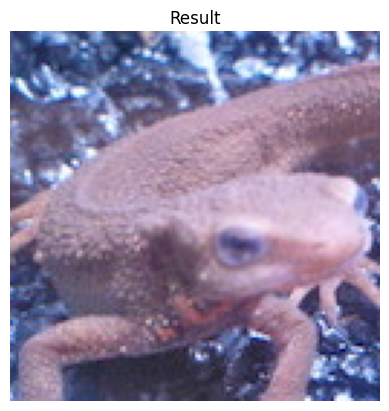

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt


proj_path = os.getcwd()
img_path = os.path.join(proj_path, "imori.jpg")

print("Image path:", img_path)  # 检查路径
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

# 兼容三/四通道
if img.ndim == 3 and img.shape[2] == 3:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
elif img.ndim == 3 and img.shape[2] == 4:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
else:
    img_show = img  # 灰度
    
# 用 matplotlib 显示
# 因为 OpenCV 默认读入的通道顺序是 BGR，而你用 matplotlib.pyplot.imshow() 显示时，它会按 RGB 去解释每个通道。
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")  # 不显示坐标轴
plt.show()

question 1 change rbg to bgr

Round-trip back to original: True


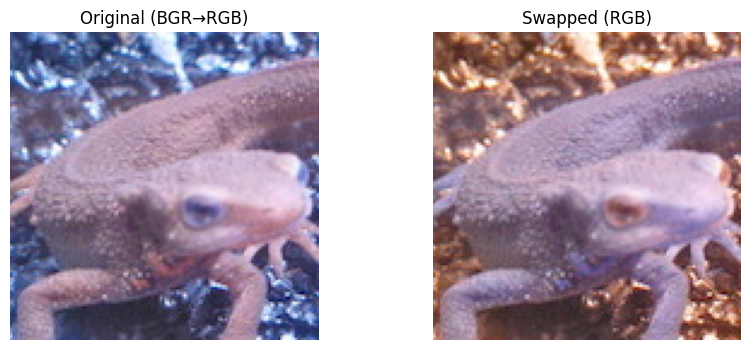

In [30]:
# import cv2
# import matplotlib.pyplot as plt

# def RGB2BGR(img):
#     r = img[:, :, 0].copy()
#     g = img[:, :, 1].copy()
#     b = img[:, :, 2].copy()
#     img[:, :, 0] = b
#     img[:, :, 1] = g
#     img[:, :, 2] = r
#     return img

# if __name__ == "__main__":
#     img_path = "imori.jpg"
#     img = cv2.imread(img_path)  # BGR
#     img2 = RGB2BGR(img.copy())  # 手动交换 → 得到“RGB版本”

#     plt.figure(figsize=(10, 4))

#     # 左边：原始（BGR → RGB，才能正确显示）
#     plt.subplot(1, 2, 1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title("Original (BGR)")
#     plt.axis("off")

#     # 右边：转换后（RGB，不需要再cv2.cvtColor）
#     plt.subplot(1, 2, 2)
#     plt.imshow(img)
#     plt.title("Converted (RGB2BGR)")
#     plt.axis("off")

#     plt.show()
import cv2
import numpy as np
import matplotlib.pyplot as plt

def swap_rb(img):
    """无副作用地交换 R 和 B；3通道或4通道都支持。"""
    if img.ndim != 3:
        return img.copy()
    if img.shape[2] == 3:
        return img[..., [2, 1, 0]].copy()      # BGR <-> RGB
    elif img.shape[2] == 4:
        return img[..., [2, 1, 0, 3]].copy()   # BGRA <-> RGBA
    else:
        return img.copy()

# 1) 读入：OpenCV 默认 BGR
img_bgr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

# 2) 交换一次：得到“RGB 等价图”
img_rgb = swap_rb(img_bgr)

# 3) 再交换一次：应当回到原始 BGR
img_bgr_roundtrip = swap_rb(img_rgb)

# 4) 自检：是否完全一致
print("Round-trip back to original:", np.array_equal(img_bgr, img_bgr_roundtrip))

# 5) 显示（关键：BGR 要先转成 RGB；RGB 直接显示）
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); plt.title("Original (BGR→RGB)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_bgr_roundtrip); plt.title("Swapped (RGB)"); plt.axis("off")
plt.show()

question 2 change rbg to gray

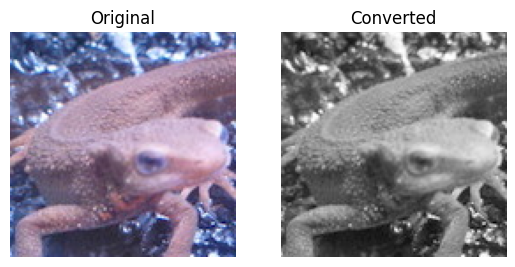

In [31]:
def RGB2GRAY(img):
    r = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 2].copy()

    gray = 0.299 * r + 0.587 * g + 0.114 * b
    gray = gray.astype("uint8")
    return gray

if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

    # RGB -> GRAY
    img2 = RGB2GRAY(img.copy()) #cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ---- 显示对比 ----
# 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title("Original")
    plt.axis("off")                 
# 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()
    

Q.3. 二値化

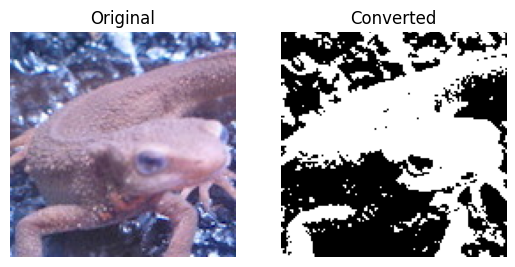

In [32]:
def RGB2binary(img, threshold=128):
    gray = RGB2GRAY(img)

    binary = gray.copy()
    binary[binary >= threshold] = 255
    binary[binary < threshold] = 0
    return binary
if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

    # RGB -> BINARY
    img2 = RGB2binary(img.copy(), threshold=128)

    # ---- 显示对比 ----
# 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title("Original")
    plt.axis("off")
# 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()



Q.4. 大津の二値化

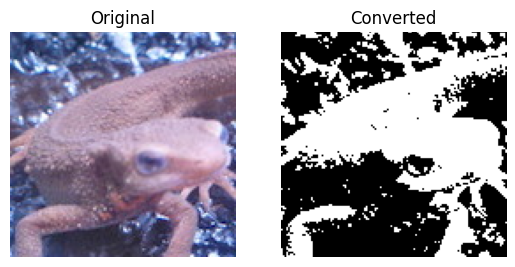

In [33]:
# import cv2
# import matplotlib.pyplot as plt
# img = cv2.imread('assets/imori.jpg')
# gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
# plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
# plt.xlabel('value')
# plt.ylabel('appearance')
# plt.show()
def RGB2otsuiBinary(img, threshold=128):
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    otsui_binary = gray.copy()
    otsui_binary[otsui_binary >= threshold] = 255
    otsui_binary[otsui_binary < threshold] = 0
    return otsui_binary

if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

    # RGB -> Otsui BINARY
    img2 = RGB2otsuiBinary(img.copy(), threshold=128)

    # ---- 显示对比 ----
# 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")
# 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()
        

Q.5. HSV変換
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
---------------------
C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)

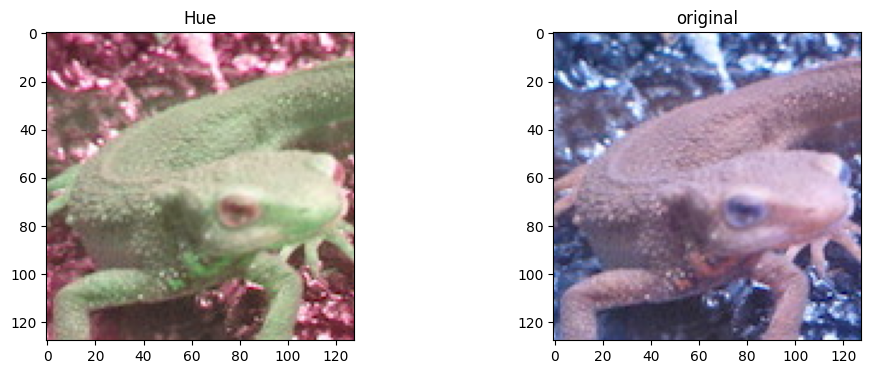

In [54]:
import numpy as np

def RGB2HSV(img):
    R = img[:, :, 0] / 255.0
    G = img[:, :, 1] / 255.0
    B = img[:, :, 2] / 255.0

    Max = np.maximum(np.maximum(R, G), B)
    Min = np.minimum(np.minimum(R, G), B)
    diff = Max - Min

    H = np.zeros_like(Max)

    # Hue
    mask = diff != 0
    mask_r = (Max == R) & mask
    mask_g = (Max == G) & mask
    mask_b = (Max == B) & mask

    H[mask_r] = (60 * ((G[mask_r] - B[mask_r]) / diff[mask_r]) + 0) % 360
    H[mask_g] = (60 * ((B[mask_g] - R[mask_g]) / diff[mask_g]) + 120) % 360
    H[mask_b] = (60 * ((R[mask_b] - G[mask_b]) / diff[mask_b]) + 240) % 360

    # Saturation
    S = np.zeros_like(Max)
    S[Max != 0] = diff[Max != 0] / Max[Max != 0]

    # Value
    V = Max

    hsv = np.dstack((H, S, V))
    return hsv

def HSV2RGB(hsv):
    H, S, V = hsv[...,0], hsv[...,1], hsv[...,2]
    C = S * V
    H_ = H / 60.0
    X = C * (1 - np.abs(H_ % 2 - 1))
    m = V - C

    rgb = np.zeros((*H.shape, 3), dtype=np.float32)
    Z = np.zeros_like(H, dtype=np.float32)

    conds = [
        (0 <= H_) & (H_ < 1),
        (1 <= H_) & (H_ < 2),
        (2 <= H_) & (H_ < 3),
        (3 <= H_) & (H_ < 4),
        (4 <= H_) & (H_ < 5),
        (5 <= H_) & (H_ < 6)
    ]
    colors = [
        (C, X, Z), (X, C, Z), (Z, C, X),
        (Z, X, C), (X, Z, C), (C, Z, X)
    ]

    for cond, (r, g, b) in zip(conds, colors):
        rgb[...,0][cond] = (r + m)[cond]
        rgb[...,1][cond] = (g + m)[cond]
        rgb[...,2][cond] = (b + m)[cond]

    rgb = np.clip(rgb * 255.0, 0, 255).astype(np.uint8)
    return rgb
if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

        # 1) 读入：OpenCV 默认 BGR
    img_bgr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    # 2) 交换一次：得到“RGB 等价图”
    img_rgb = swap_rb(img_bgr)

    hsv = RGB2HSV(img_rgb.copy())

    hsv[...,0] =  (hsv[...,0] + 120) % 360
    # hsv[...,1] =  (hsv[...,1] + 120) % 360
    # S = hsv[..., 1]
    # V = hsv[..., 2]

    out = HSV2RGB(hsv.copy())


    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1); plt.imshow(out, cmap='hsv'); plt.title("Hue")
    plt.subplot(1,2,2); plt.imshow(img_rgb); plt.title("original")
    plt.show()

    # RGB -> HSV
#     img2 = RGB2HSV(img_rgb.copy()) #cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#     # ---- 显示对比 ----
# # 原图
#     plt.subplot(1, 2, 1)
#     plt.imshow(img_rgb)
#     plt.title("Original")
#     plt.axis("off")
# # 转换后图像

#     plt.subplot(1, 2, 2)
#     plt.imshow(img2)
#     plt.title("Converted")
#     plt.axis("off")
#     plt.show()


Q.6. 減色処理

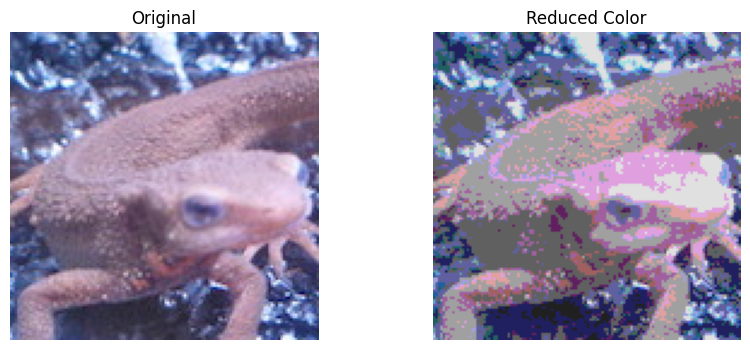

In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def reduce_color(img):
    """将图像像素值量化为 {32, 96, 160, 224} 四档"""
    img = img.astype(np.uint8, copy=False)
    out = np.zeros_like(img, dtype=np.uint8)

    if img.ndim == 3:  # 彩色图像
        for i in range(3):
            channel = img[..., i]
            reduced = np.select(
                [
                    (channel < 64),
                    (channel >= 64) & (channel < 128),
                    (channel >= 128) & (channel < 192),
                    (channel >= 192),
                ],
                [np.uint8(32), np.uint8(96), np.uint8(160), np.uint8(224)],
                default=channel
            )
            out[..., i] = reduced.astype(np.uint8, copy=False)
    else:  # 灰度图
        out = np.select(
            [
                (img < 64),
                (img >= 64) & (img < 128),
                (img >= 128) & (img < 192),
                (img >= 192),
            ],
            [np.uint8(32), np.uint8(96), np.uint8(160), np.uint8(224)],
            default=img
        ).astype(np.uint8, copy=False)
    return out


# ========== 示例 ==========
if __name__ == "__main__":
    img_path = "imori.jpg"
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = reduce_color(img_rgb.copy())
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Reduced Color")
    plt.axis("off")
    plt.show()